In [61]:
from typing import Dict, TypedDict, List, Optional
from langgraph.graph import StateGraph, START, END

In [62]:
class AgentState(TypedDict):
    number1 : int
    operation1 : str
    number2 : int
    operation2 : str
    number3 : int
    finalNumber : Optional[int]

In [63]:
def addition_1(state: AgentState) -> AgentState:
    """ Node to add both number

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    state['finalNumber'] = state['number1'] + state['number2']
    
    return state

def subtraction_1(state: AgentState) -> AgentState:
    """ Node to subtract both number

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    state['finalNumber'] = state['number1'] - state['number2']
    
    return state

def node_router_1(state: AgentState) -> AgentState:
    """This node will route the state to the next node

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    if state['operation1'] == "+":
        return "addition_operation_1"
    
    elif state['operation2'] == "-":
        return "subtraction_operation_1"

def addition_2(state: AgentState) -> AgentState:
    """ Node to add the result of the previous node with number 3

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    state['finalNumber'] = state['finalNumber'] + state['number3']
    
    return state

def subtraction_2(state: AgentState) -> AgentState:
    """ Node to subtract number 3 from the result of the previous node

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    state['finalNumber'] = state['finalNumber'] - state['number3']
    
    return state

def node_router_2(state: AgentState) -> AgentState:
    """This node will route the state to the next node

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    if state['operation2'] == "+":
        return "addition_operation_2"
    
    elif state['operation2'] == "-":
        return "subtraction_operation_2"

In [64]:
graph = StateGraph(AgentState)

graph.add_node("add_1", addition_1)
graph.add_node("add_2", addition_2)
graph.add_node("subtract_1", subtraction_1)
graph.add_node("subtract_2", subtraction_2)
graph.add_node("router_1", lambda state: state)
graph.add_node("router_2", lambda state: state)

graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",
    node_router_1,
    {
        "addition_operation_1" : "add_1",
        "subtraction_operation_1" : "subtract_1"
    }
)

graph.add_edge("add_1", "router_2")
graph.add_edge("subtract_1", "router_2")

graph.add_conditional_edges(
    "router_2",
    node_router_2,
    {
        "addition_operation_2" : "add_2",
        "subtraction_operation_2" : "subtract_2"
    }
)

graph.add_edge("add_2", END)
graph.add_edge("subtract_2", END)

app = graph.compile()

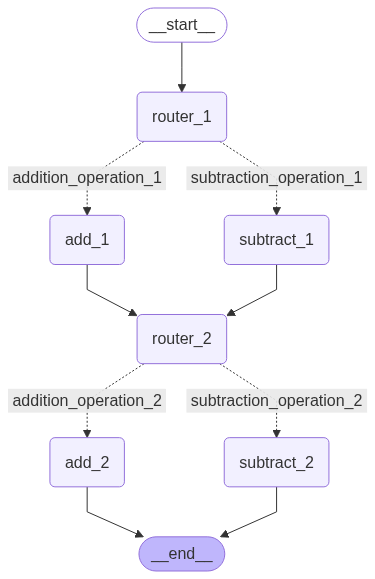

In [65]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [66]:
result = app.invoke({
    "number1" : 10,
    "operation1" : "+",
    "number2" : 5,
    "operation2" : "+",
    "number3" : 2,
    "finalNumber" : None
})

print(result['finalNumber'])

17
